In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
import xesmf as xe


In [2]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [3]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009'
ds_llc270 =  xmitgcm.open_mdsdataset(dir_llc270,iters='all',geometry='llc',default_dtype='>f4')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/llc270_2008_2009. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/an

In [4]:
XCfull = np.zeros((270,540))
XCfull[:,0:270] = np.rot90(ds_llc270.XC.sel(face=10).values)
XCfull[:,270:540] = ds_llc270.XC.sel(face=2).values

YCfull = np.zeros((270,540))
YCfull[:,0:270] = np.rot90(ds_llc270.YC.sel(face=10).values)
YCfull[:,270:540] = ds_llc270.YC.sel(face=2).values

XGfull = np.zeros((270,540))
XGfull[:,0:270] = np.rot90(ds_llc270.XG.sel(face=10).values)
XGfull[:,270:540] = ds_llc270.XG.sel(face=2).values

YGfull = np.zeros((270,540))
YGfull[:,0:270] = np.rot90(ds_llc270.YG.sel(face=10).values)
YGfull[:,270:540] = ds_llc270.YG.sel(face=2).values


In [5]:
fold = open('/central/groups/oceanphysics/anirban/NA/inputfiles/NA_2160/NA_2160/input_ll1815/delYFile', 'rb')
delYold1815 = np.fromfile(fold, '>f4')
delYold1815.shape

(532,)

In [6]:
idy = (np.where((YGfull[:,-2]>=26.855293273925781) & (YGfull[:,-2]<np.sum(delYold1815)+ 26.855293273925781))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-81.583335876464844) & (XGfull[2,:]<-81.583335876464844+0.041666666666667*1815))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
xc = XCsmall[idy]
yc = YCsmall[:,idx]
xg = XGsmall[idy]
yg = YGsmall[:,idx]
xc.shape, yc.shape, xg.shape, yg.shape

((67, 227), (67, 227), (67, 227), (67, 227))

In [37]:
xg

array([[-81.33333588, -81.        , -80.66666412, ...,  -6.66666651,
         -6.33333349,  -6.        ],
       [-81.33333588, -81.        , -80.66666412, ...,  -6.66666651,
         -6.33333349,  -6.        ],
       [-81.33333588, -81.        , -80.66666412, ...,  -6.66666651,
         -6.33333349,  -6.        ],
       ...,
       [-81.33333588, -81.        , -80.66666412, ...,  -6.66666651,
         -6.33333349,  -6.        ],
       [-81.33333588, -81.        , -80.66666412, ...,  -6.66666651,
         -6.33333349,  -6.        ],
       [-81.33333588, -81.        , -80.66666412, ...,  -6.66666651,
         -6.33333349,  -6.        ]])

In [7]:
Saltfull = np.zeros((50,270,540))

Saltfull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=10).values, 1, (1,2))
Saltfull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).SALT.sel(face=2).values

#Saltfull[:,:,0:270] =  np.rot90(ds_llc270.isel(time=0).SALT.sel(face=10).values, 1, (1,2))
#Saltfull[:,:,270:540] =  ds_llc270.isel(time=0).SALT.sel(face=2).values

Salt = Saltfull[:,idy][:,:,idx]

Thetafull = np.ma.zeros((50,270,540))

Thetafull[:,:,0:270] =  np.rot90(ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=10).values, 1, (1,2))
Thetafull[:,:,270:540] =  ds_llc270.where(ds_llc270.hFacC).isel(time=0).THETA.sel(face=2).values

#Thetafull[:,:,0:270] =  np.rot90(ds_llc270.isel(time=0).THETA.sel(face=10).values, 1, (1,2))
#Thetafull[:,:,270:540] =  ds_llc270.isel(time=0).THETA.sel(face=2).values

Theta = Thetafull[:,idy][:,:,idx]


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 24
  **blockwise_kwargs)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/dask/array/core.py:3141: PerformanceWarning: Increasing number of chunks by factor of 50
  

In [8]:
def Xpolate(field):
    x = field.copy()
    x0 = field.copy()
    [M,N] = x.shape
    y = np.nan*np.ones((M,N)); y[0:M,0:N] = x;
    X,Y = np.meshgrid(np.arange(N),np.arange(M))
    m = M; n= N
    y[np.isnan(x)]=np.nanmean(x)
    mc = np.fix(M/2)+1;nc=np.fix(N/2)+1
    w=np.zeros((m,n));
    maxx=np.max(x); minx=np.min(x);
    for i in range(int(max(mc,nc))):
        f=np.fft.fftshift(np.fft.fft2(y));
        w[int(max((mc-i),0)):int(min((mc+i),m)),int(max((nc-i),0)):int(min((nc+i),n))] = 1
        f=f*w;
        f=np.real(np.fft.ifft2(np.fft.ifftshift(f)));
        y[np.isnan(x0)]=f[np.isnan(x0)];                       
        y[y>maxx]=maxx;
        y[y<minx]=minx;
    y=y[:M,:N];
    return y

In [9]:
Salt_noland = np.zeros_like(Salt)
for i in range(len(Salt)):
    Salt_noland[i] = Xpolate(Salt[i])


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


In [10]:
Salt_noland.shape

(50, 67, 227)

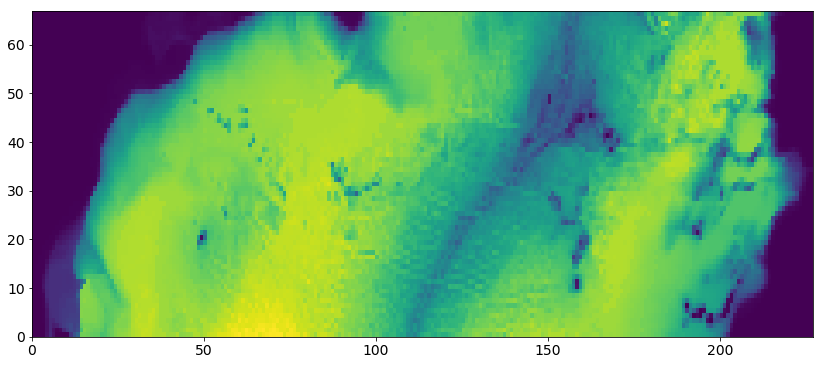

In [11]:
depthfull = np.zeros((270,540))
depthfull[:,0:270] = np.rot90(ds_llc270.Depth.sel(face=10).values)
depthfull[:,270:540] = ds_llc270.Depth.sel(face=2).values
depth = depthfull[idy,:][:,idx]
plt.pcolormesh(depth)

In [141]:
Salt_noland_masked.mask.shape

(50, 67, 227)

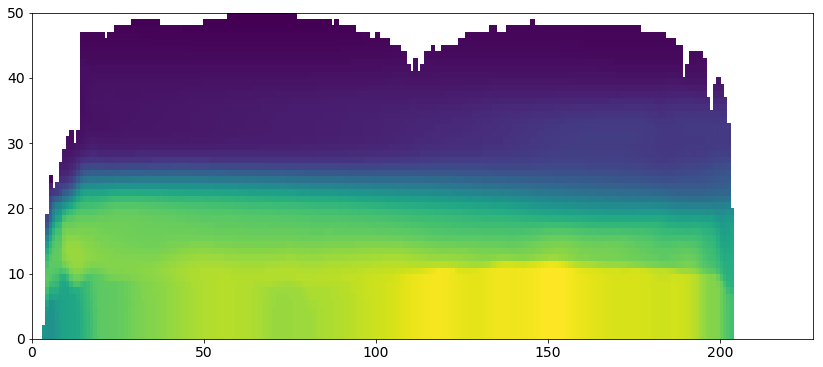

In [125]:
Salt_masked = np.ma.masked_where(np.isnan(Salt), Salt)
Salt_noland_masked = np.ma.masked_where(np.isnan(Salt), Salt_noland)

plt.pcolormesh(Salt_noland_masked[:,2])

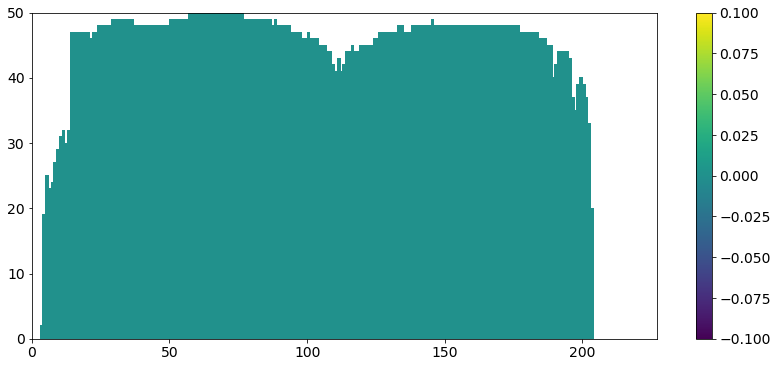

In [92]:
plt.pcolormesh(Salt_noland_masked[:,2] - Salt_masked[:,2]);plt.colorbar()

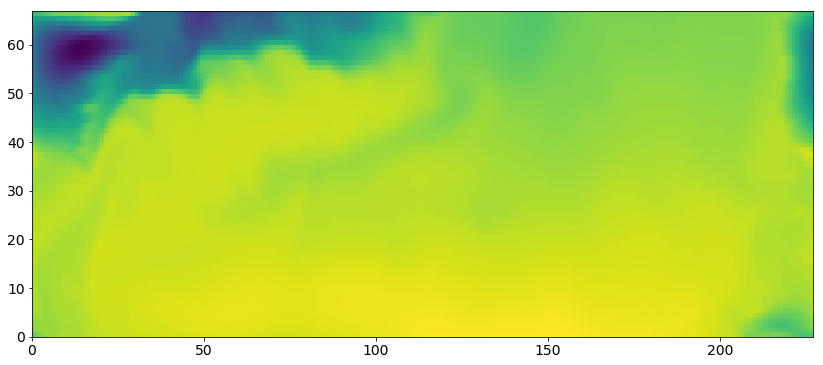

In [94]:
plt.pcolormesh(Salt_noland[0])

In [39]:
Salt_expolate = Xpolate(Salt[0])

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


In [40]:
Salt_expolate.shape

(67, 227)

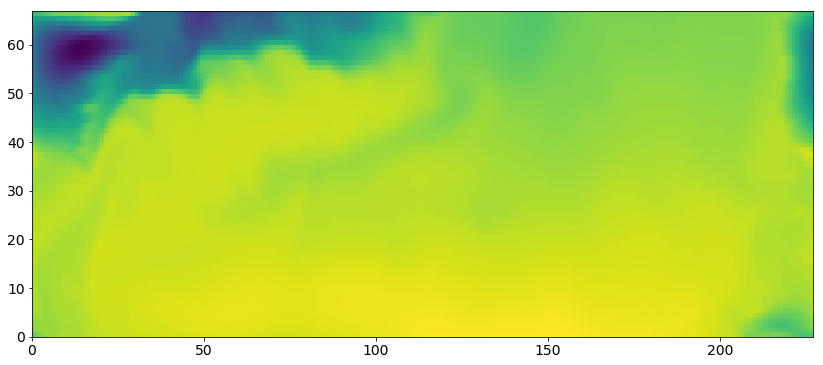

In [41]:
plt.pcolormesh(Salt_expolate)

In [16]:
depth.shape

(67, 227)

In [12]:
ddir0 = '/central/groups/oceanphysics/anirban/NA/experiments/run_ll1815_04'
ds_2 = xmitgcm.open_mdsdataset(ddir0,iters=None,default_dtype='>f4')

In [19]:
depth_fine = ds_2.Depth.values
depth_fine.shape

(532, 1815)

In [21]:

yorigin = 26.855293273925781
xorigin = -81.583335876464844
ygr = yorigin + np.cumsum(delYold1815)
ygl = yorigin*np.ones_like(delYold1815)
ygl[1:] = ygr[:-1]
YC = 0.5*(ygl+ygr)
#xgl = np.arange(xorigin, xorigin+0.041666666666667*1815, 0.041666666666667)
XC = np.arange(xorigin+0.041666666666667/2, xorigin+0.041666666666667*1815, 0.041666666666667)

x = xc[10]
y = yc[:,10]
z = ds_llc270.Z.values


#x_fine, y_fine = np.meshgrid(XC,YC)
x_fine = XC
y_fine = YC
z_fine = ds_2.Z.values


Salt[0].shape, x.shape, y.shape, x_fine.shape, y_fine.shape

((67, 227), (227,), (67,), (1815,), (532,))

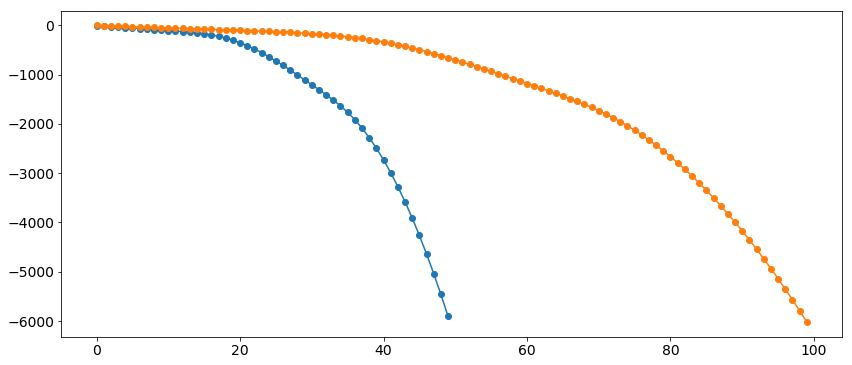

In [28]:
plt.plot(z, 'o-')
plt.plot(z_fine, 'o-')

In [40]:
z_fine

array([-2.500000e+00, -7.500000e+00, -1.250000e+01, -1.750000e+01,
       -2.250000e+01, -2.750000e+01, -3.250000e+01, -3.750000e+01,
       -4.250000e+01, -4.750000e+01, -5.250000e+01, -5.750000e+01,
       -6.250000e+01, -6.750000e+01, -7.250000e+01, -7.750500e+01,
       -8.251500e+01, -8.753000e+01, -9.256000e+01, -9.761500e+01,
       -1.027100e+02, -1.078700e+02, -1.131250e+02, -1.185250e+02,
       -1.241300e+02, -1.300100e+02, -1.362550e+02, -1.429650e+02,
       -1.502600e+02, -1.582800e+02, -1.671700e+02, -1.770800e+02,
       -1.881700e+02, -2.005950e+02, -2.145100e+02, -2.300600e+02,
       -2.473800e+02, -2.665900e+02, -2.877850e+02, -3.110350e+02,
       -3.363950e+02, -3.638950e+02, -3.935350e+02, -4.252850e+02,
       -4.590900e+02, -4.948800e+02, -5.325600e+02, -5.720100e+02,
       -6.130950e+02, -6.556700e+02, -6.995800e+02, -7.446700e+02,
       -7.907800e+02, -8.377600e+02, -8.854650e+02, -9.337550e+02,
       -9.825100e+02, -1.031635e+03, -1.081045e+03, -1.130670e

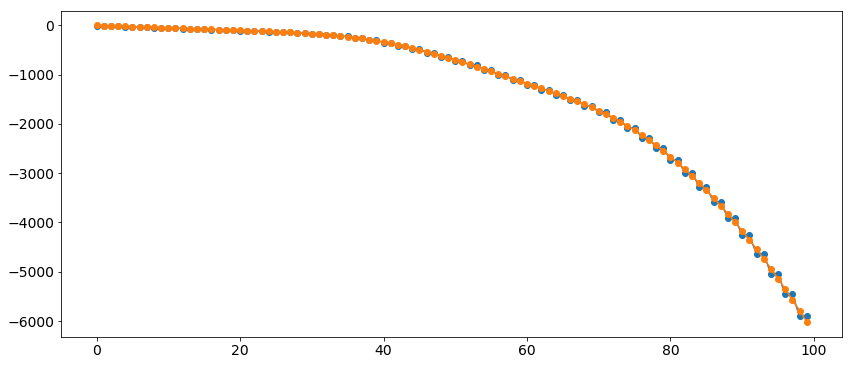

In [46]:
z_new = np.zeros_like(z_fine)
z_new[0::2]=z
z_new[1::2]=z
plt.plot(z_new, 'o-')
plt.plot(z_fine,'o-')

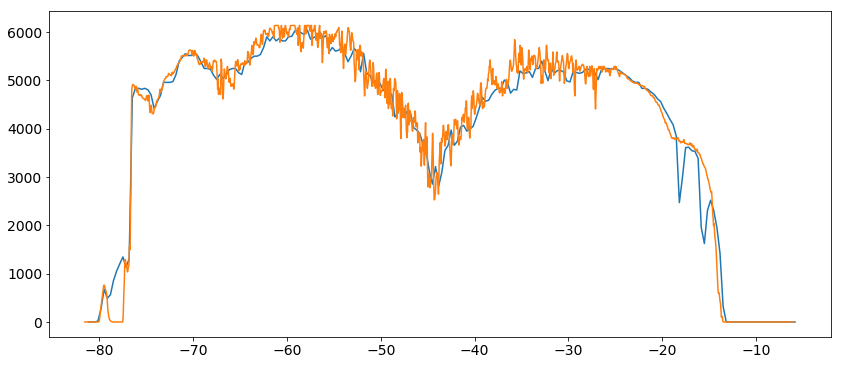

In [29]:
plt.plot(x,depth[2])
plt.plot(x_fine,depth_fine[2])


In [32]:
x

array([-81.16666412, -80.83333588, -80.5       , -80.16666412,
       -79.83333588, -79.5       , -79.16666412, -78.83333588,
       -78.5       , -78.16666412, -77.83333588, -77.5       ,
       -77.16666412, -76.83333588, -76.5       , -76.16666412,
       -75.83333588, -75.5       , -75.16666412, -74.83333588,
       -74.5       , -74.16666412, -73.83333588, -73.5       ,
       -73.16666412, -72.83333588, -72.5       , -72.16666412,
       -71.83333588, -71.5       , -71.16666412, -70.83333588,
       -70.5       , -70.16666412, -69.83333588, -69.5       ,
       -69.16666412, -68.83333588, -68.5       , -68.16666412,
       -67.83333588, -67.5       , -67.16666412, -66.83333588,
       -66.5       , -66.16666412, -65.83333588, -65.5       ,
       -65.16666412, -64.83333588, -64.5       , -64.16666412,
       -63.83333206, -63.5       , -63.16666794, -62.83333206,
       -62.5       , -62.16666794, -61.83333206, -61.5       ,
       -61.16666794, -60.83333206, -60.5       , -60.16

In [31]:
x_fine

array([-81.56250254, -81.52083588, -81.47916921, ...,  -6.06250254,
        -6.02083588,  -5.97916921])

In [108]:
from scipy.interpolate import interp1d
fS = interp1d(x,depth[1], kind='nearest', bounds_error=False, fill_value='extrapolate')
fN = interp1d(x,depth[-1], kind='nearest', bounds_error=False, fill_value='extrapolate')
depth_new_S = fS(x_fine)
depth_new_N = fN(x_fine)

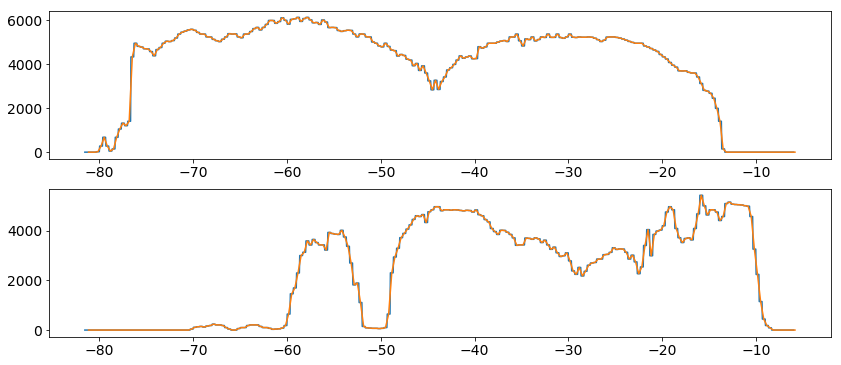

In [109]:
plt.subplot(211)
plt.plot(x_fine,depth_new_S)
plt.plot(x,depth[1])
plt.subplot(212)
plt.plot(x_fine,depth_new_N)
plt.plot(x,depth[-1])


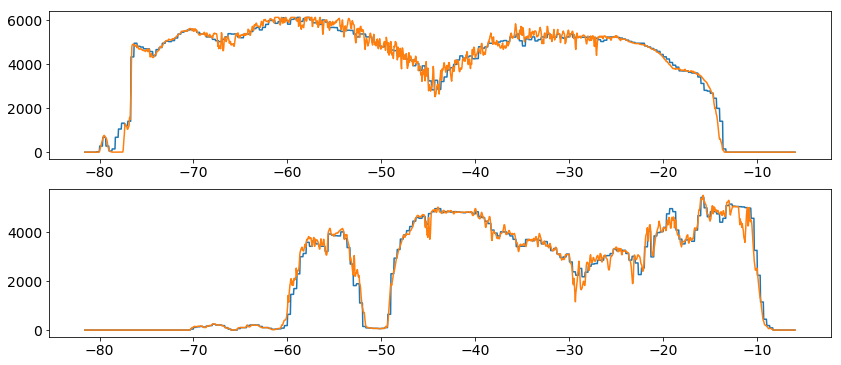

In [110]:
plt.subplot(211)
plt.plot(x_fine,depth_new_S)
plt.plot(x_fine,depth_fine[2])
plt.subplot(212)
plt.plot(x_fine,depth_new_N)
plt.plot(x_fine,depth_fine[-2])


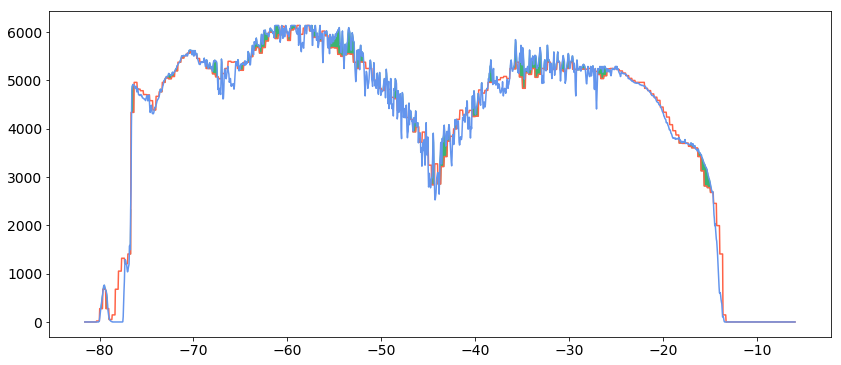

In [114]:
plt.plot(x_fine,depth_new_S, color=color1)
plt.plot(x_fine,depth_fine[2], color=color2)
plt.fill_between(x_fine,depth_fine[2],depth_new_S,where=(depth_fine[2]>depth_new_S),color=color3)




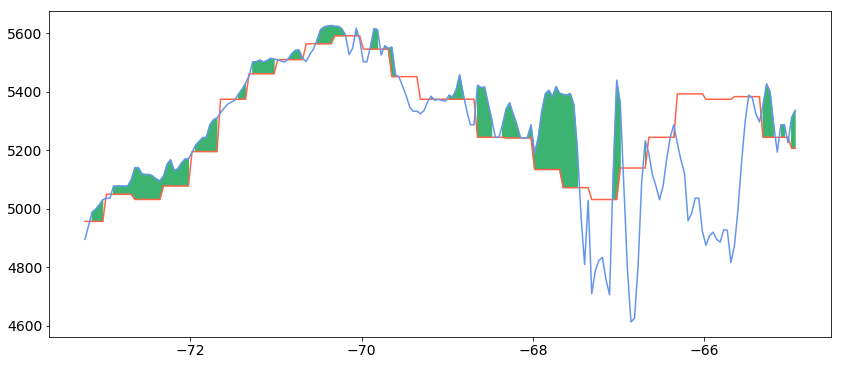

In [103]:
plt.plot(x_fine[200:400],depth_new_S[200:400], color=color1)
plt.plot(x_fine[200:400],depth_fine[2,200:400], color=color2)
plt.fill_between(x_fine[200:400],depth_fine[2,200:400],depth_new_S[200:400],where=(depth_fine[2,200:400]>depth_new_S[200:400]),color=color3)




In [54]:
dx_fine = ds_2.dxG.values
dx_fine[2]

array([4130.2935, 4130.2935, 4130.2935, ...,    0.    ,    0.    ,
          0.    ], dtype=float32)

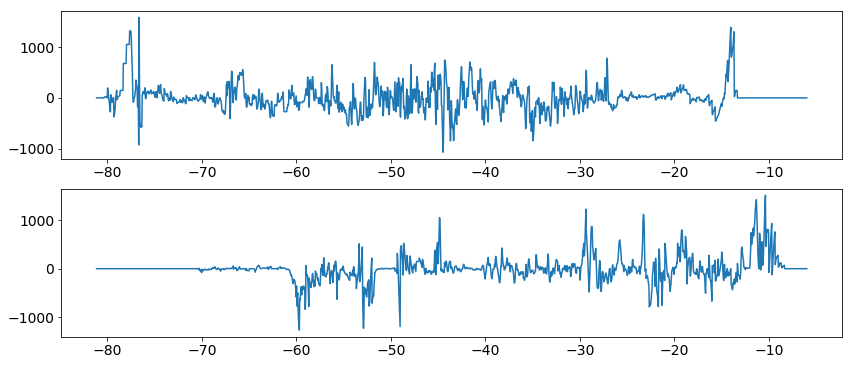

In [84]:
plt.subplot(211)
plt.plot(x_fine,depth_new_S - depth_fine[2])
plt.subplot(212)
plt.plot(x_fine,depth_new_N - depth_fine[-2])


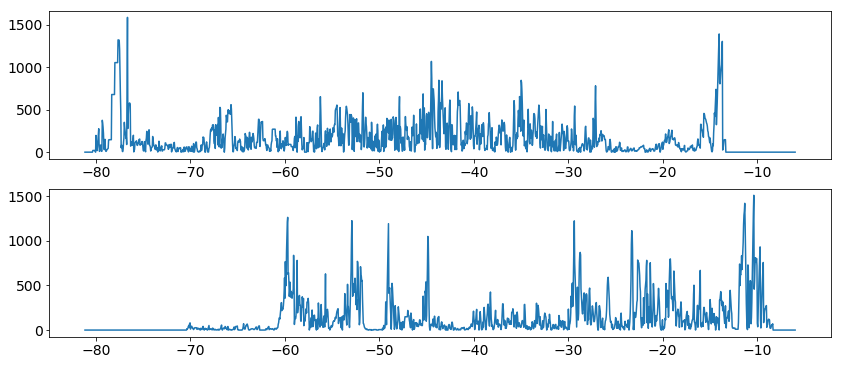

In [85]:
plt.subplot(211)
plt.plot(x_fine,np.abs(depth_new_S - depth_fine[2]))
plt.subplot(212)
plt.plot(x_fine,np.abs(depth_new_N - depth_fine[-2]))


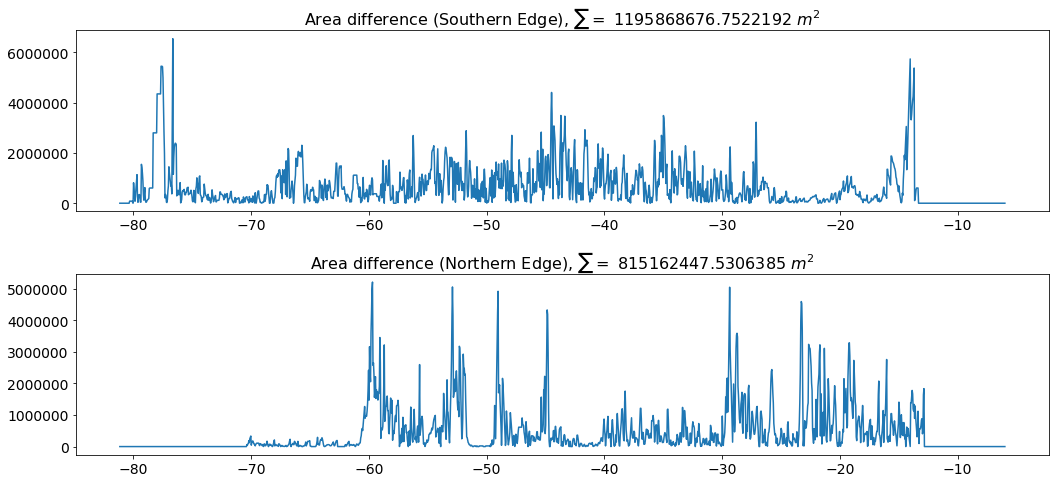

In [93]:
plt.figure(figsize=(15,7))
plt.subplot(211)
plt.plot(x_fine,np.abs(depth_fine[2]-depth_new_S)*dx_fine[2])
plt.title(r'Area difference (Southern Edge), $\sum=$ %s $m^2$' %(np.nansum(np.abs(depth_fine[2]-depth_new_S)*dx_fine[2])));
plt.subplot(212)
plt.plot(x_fine,np.abs(depth_fine[-2]-depth_new_N)*dx_fine[2])
plt.title(r'Area difference (Northern Edge), $\sum=$ %s $m^2$' %(np.nansum(np.abs(depth_fine[-2]-depth_new_N)*dx_fine[-2])));
#plt.xlabel(['x'])
plt.tight_layout()

           

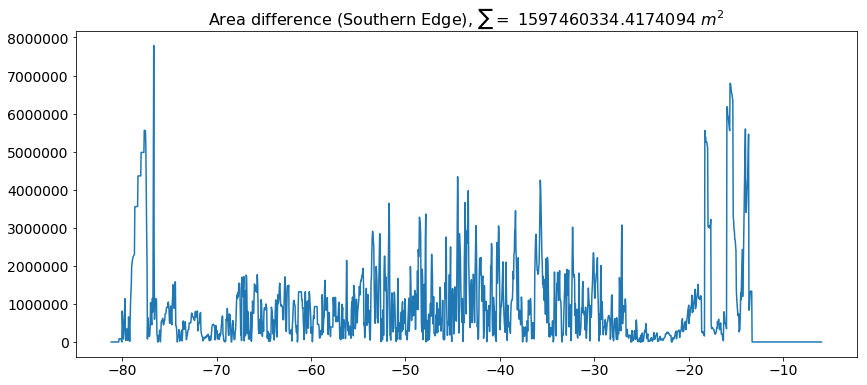

In [80]:
plt.plot(x_fine,np.abs(depth_fine[2]-depth_new)*dx_fine[2])
plt.title(r'Area difference (Southern Edge), $\sum=$ %s $m^2$' %(np.nansum(np.abs(depth_fine[2]-depth_new)*dx_fine[2])));
           

In [116]:
Salt_noland.shape

(50, 67, 227)

In [176]:
depth_fine.shape

(532, 1815)

In [211]:
sal_S = xr.DataArray(np.flipud(Salt_S_fine), coords={'Z': z_fine,'XC': x_fine,},
             dims=['Z','XC'])
sal_N = xr.DataArray(np.flipud(Salt_N_fine), coords={'Z': z_fine,'XC': x_fine,},
             dims=['Z','XC'])
depth_f_S = xr.DataArray(depth_fine[2]*-1, coords={'XC': x_fine}, dims=['XC'])
depth_f_N = xr.DataArray(depth_fine[-2]*-1, coords={'XC': x_fine}, dims=['XC'])
depth_c_S = xr.DataArray(depth_new_S*-1, coords={'XC': x_fine}, dims=['XC'])
depth_c_N = xr.DataArray(depth_new_N*-1, coords={'XC': x_fine}, dims=['XC'])


In [212]:
ds = xr.Dataset({'salt_N': sal_N,'salt_S': sal_S,
                 'depth_f_S': depth_f_S,'depth_f_S': depth_f_S,
                 'depth_c_S': depth_c_S,'depth_c_S': depth_c_S,})
ds

<xarray.Dataset>
Dimensions:    (XC: 1815, Z: 100)
Coordinates:
  * Z          (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * XC         (XC) float64 -81.56 -81.52 -81.48 -81.44 ... -6.063 -6.021 -5.979
Data variables:
    salt_N     (Z, XC) float64 34.66 34.66 34.66 ... -0.003447 -0.00362
    salt_S     (Z, XC) float64 35.81 35.81 35.81 ... -0.0005765 -0.0006563
    depth_f_S  (XC) float32 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0
    depth_c_S  (XC) float64 -0.0 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0 -0.0

In [216]:
xx,zz = np.meshgrid(x_fine, z_fine)
xx.shape,zz.shape, Salt_N_fine.shape

((100, 1815), (100, 1815), (100, 1815))

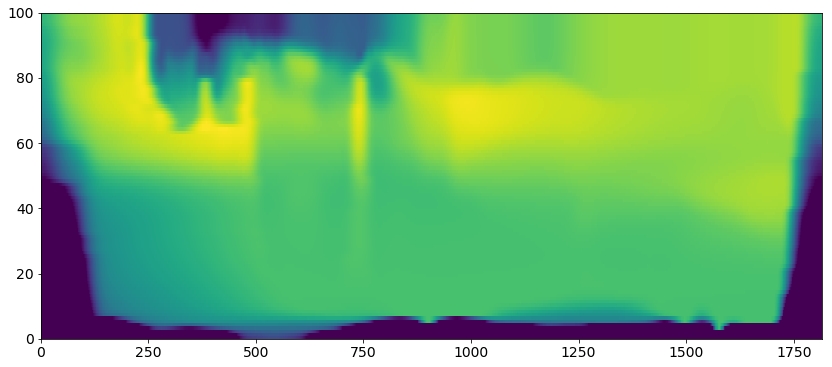

In [221]:
plt.pcolormesh(Salt_N_fine, vmin=31)

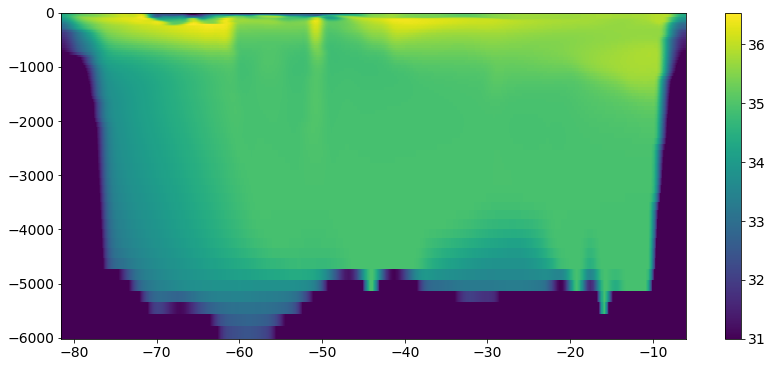

In [222]:
plt.pcolormesh(xx, zz, np.flipud(Salt_N_fine), vmin=31);plt.colorbar()

In [201]:
ds.salt_N

<xarray.DataArray 'salt_N' (Z: 100, XC: 1815)>
array([[-6.011552e-03, -6.011552e-03, -6.011552e-03, ..., -3.274029e-03,
        -3.447159e-03, -3.620289e-03],
       [ 1.111581e+00,  1.111581e+00,  1.111581e+00, ...,  1.131191e+00,
         1.129407e+00,  1.127624e+00],
       [ 3.263446e+00,  3.263446e+00,  3.263446e+00, ...,  3.315544e+00,
         3.310660e+00,  3.305776e+00],
       ...,
       [ 3.463803e+01,  3.463803e+01,  3.463803e+01, ...,  3.462454e+01,
         3.462056e+01,  3.461659e+01],
       [ 3.465371e+01,  3.465371e+01,  3.465371e+01, ...,  3.464120e+01,
         3.463724e+01,  3.463327e+01],
       [ 3.466155e+01,  3.466155e+01,  3.466155e+01, ...,  3.464954e+01,
         3.464557e+01,  3.464161e+01]])
Coordinates:
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * XC       (XC) float64 -81.56 -81.52 -81.48 -81.44 ... -6.063 -6.021 -5.979

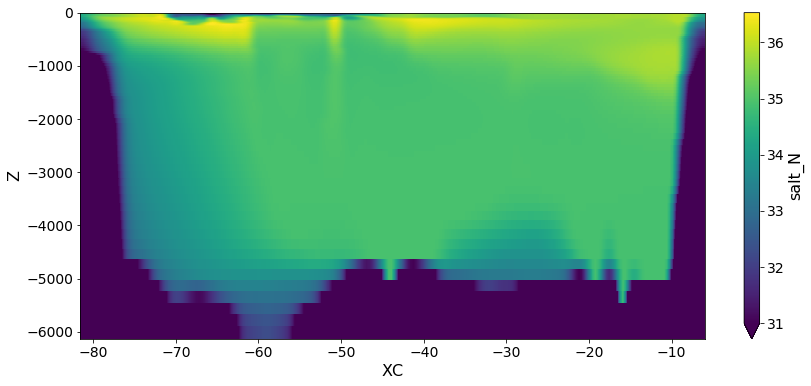

In [213]:
ds.salt_N.plot(vmin=31)

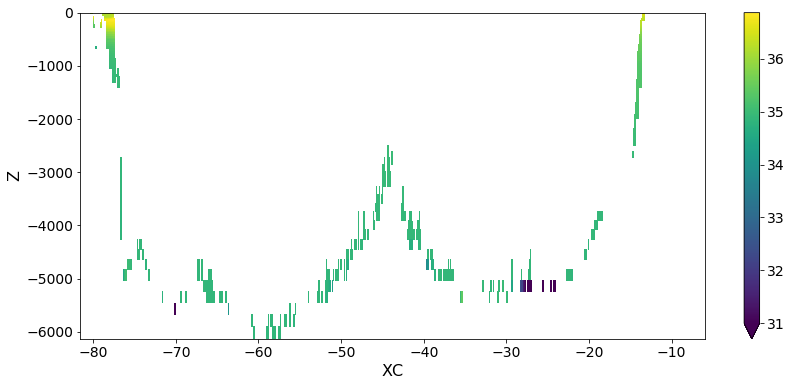

In [230]:
ds.salt_S.where(ds.Z>depth_c_S).where(ds.Z<depth_f_S).plot(vmin=31)

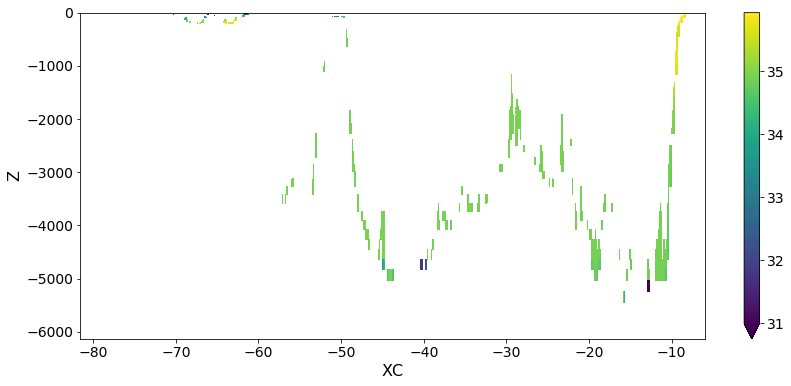

In [227]:
ds.salt_N.where(ds.Z>depth_c_N).where(ds.Z<depth_f_N).plot(vmin=31)

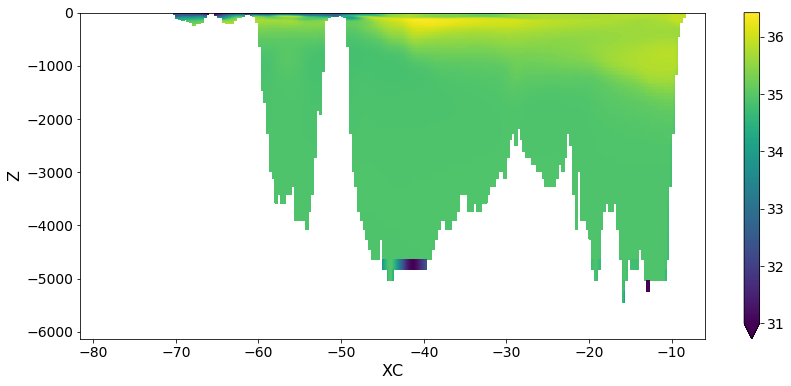

In [229]:
ds.salt_N.where(ds.Z>depth_c_N).plot(vmin=31)

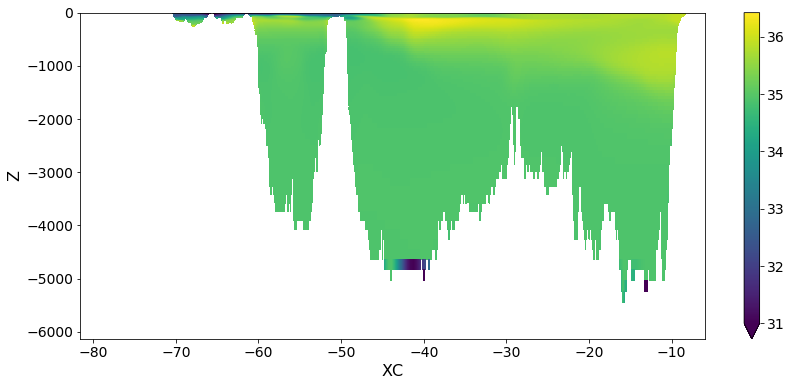

In [224]:
ds.salt_N.where(ds.Z>depth_f_N).plot(vmin=31)

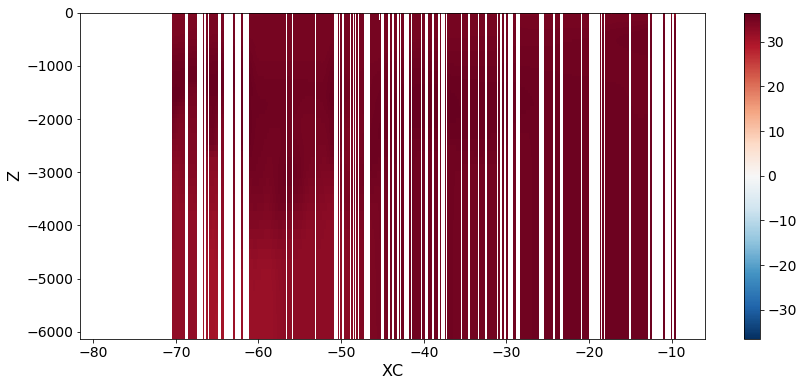

In [197]:
ds.salt_N.where(depth_c_N>depth_f_N).plot()

In [193]:
edge = ['N','S']
vari = ['salt','depth_c','depth_f']
qty ={}
for var in vari:
    for ed in edge:
        print('%s_%s' %(var,ed))

salt_N
salt_S
depth_c_N
depth_c_S
depth_f_N
depth_f_S


In [194]:
edge = ['N','S']
vari = ['salt','depth_c','depth_f']

for var in vari:
    ds2 = xr.concat([ds['%s_%s' %(var,ed)] for ed in edge], 
                    dim=xr.Variable('edge', edge)).to_dataset(name='%s'%var)

KeyError: 'depth_c_N'

In [191]:
edge = ['N','S']
vari = ['salt','depth_c','depth_f']
qty ={}
for var in vari:
    qty[var] = xr.concat([ds['%s_%s' %(var,ed)] for ed in edge], 
                    dim=xr.Variable('edge', edge)).rename('%s'%var)

KeyError: 'depth_c_N'

In [186]:
ds2

<xarray.DataArray 'salt' (edge: 2, Z: 100, XC: 1815)>
array([[[-6.011552e-03, -6.011552e-03, ..., -3.447159e-03, -3.620289e-03],
        [ 1.111581e+00,  1.111581e+00, ...,  1.129407e+00,  1.127624e+00],
        ...,
        [ 3.465371e+01,  3.465371e+01, ...,  3.463724e+01,  3.463327e+01],
        [ 3.466155e+01,  3.466155e+01, ...,  3.464557e+01,  3.464161e+01]],

       [[-1.869256e-03, -1.869256e-03, ..., -5.765086e-04, -6.563474e-04],
        [ 1.015492e+00,  1.015492e+00, ...,  1.000427e+00,  1.001546e+00],
        ...,
        [ 3.580741e+01,  3.580741e+01, ...,  3.550637e+01,  3.552881e+01],
        [ 3.580805e+01,  3.580805e+01, ...,  3.550908e+01,  3.553131e+01]]])
Coordinates:
  * Z        (Z) >f4 -2.5 -7.5 -12.5 -17.5 ... -5568.185 -5790.69 -6018.94
  * XC       (XC) float64 -81.56 -81.52 -81.48 -81.44 ... -6.063 -6.021 -5.979
  * edge     (edge) <U1 'N' 'S'

In [189]:
edge = ['N','S']
vari = ['salt','depth_c','depth_f']
i = 0
ds2 = xr.concat([xr.concat([ds['%s_%s' %(var,ed)] for ed in edge], for var in vari],
                    dim=xr.Variable('edge', edge)).to_dataset(name='%s'%vari[i])

SyntaxError: invalid syntax (<ipython-input-189-b1e5da47e805>, line 4)

In [ ]:
land = xr.concat([for ed in edge], 
                    dim=xr.Variable('edge', edge)).to_dataset(name='salt')

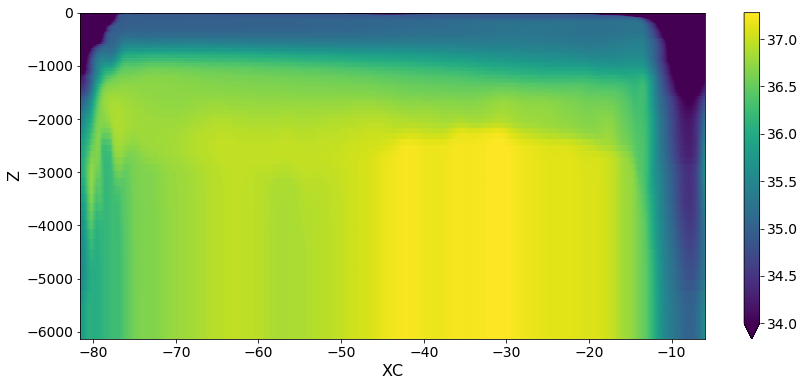

In [173]:
ds_new = xr.Dataset(sal_S)

In [118]:
from scipy.interpolate import interp2d

In [120]:
f_N = interp2d(x,z, Salt_noland[:,-1], kind='linear')
f_S = interp2d(x,z, Salt_noland[:,1], kind='linear')


Salt_N_fine = f_N(x_fine, z_fine)
Salt_S_fine = f_S(x_fine, z_fine)


In [135]:
Salt_S_fine.shape

(100, 1815)

In [163]:
mask0 = (~Salt_noland_masked.mask).astype('float')

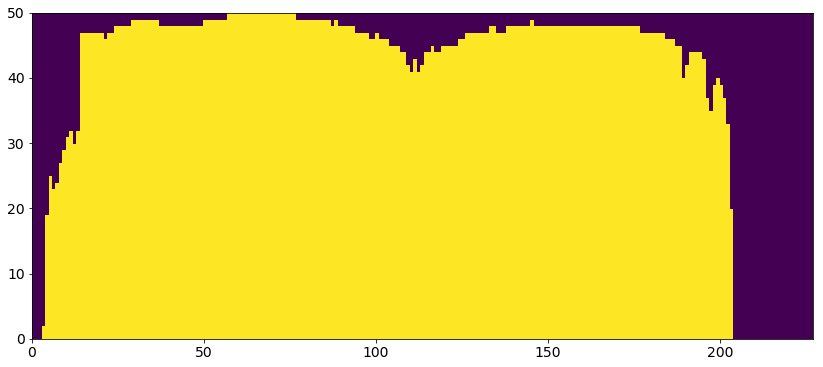

In [164]:
plt.pcolormesh(mask0[:,2])

In [165]:
f_N_mask = interp2d(x,z, mask0[:,-1], kind='nearest')
f_S_mask = interp2d(x,z, mask0[:,1], kind='nearest')


mask_N_fine = f_N(x_fine, z_fine)
mask_S_fine = f_S(x_fine, z_fine)


ValueError: Unsupported interpolation type.

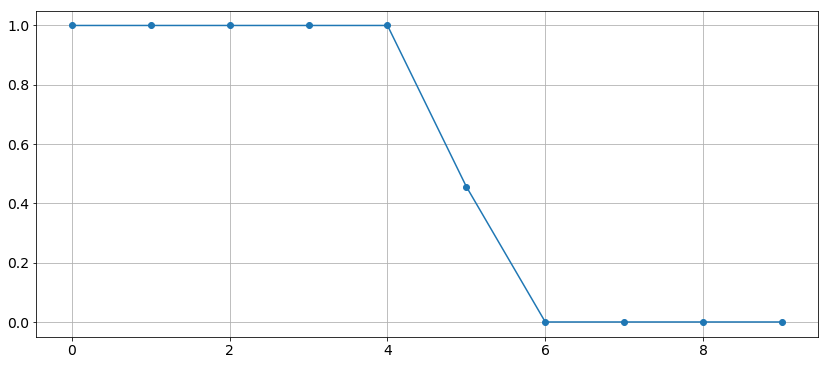

In [154]:
plt.plot(landmask_f_ds[90:100,2,225],'o-');plt.grid()

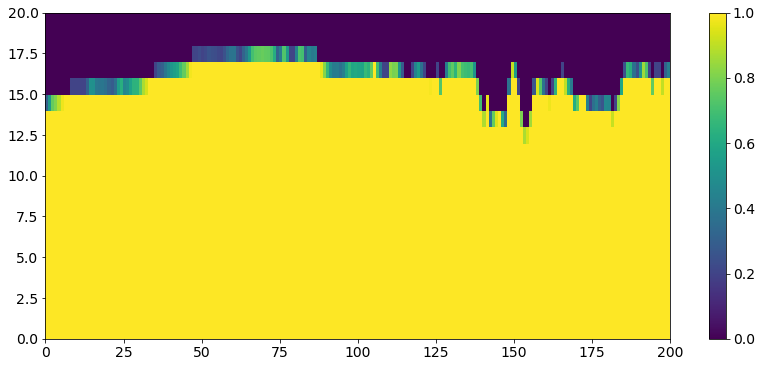

In [149]:
plt.pcolormesh(landmask_f_ds[80:100,2,200:400]);plt.colorbar()

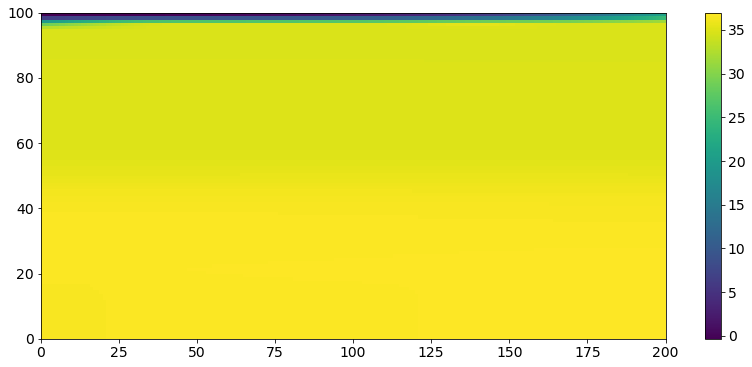

In [136]:
plt.pcolormesh(np.flipud(Salt_S_fine[:,200:400]));plt.colorbar()

In [129]:
landmask_f_ds = ds_2.hFacC.values
landmask_f_ds.shape

(100, 532, 1815)

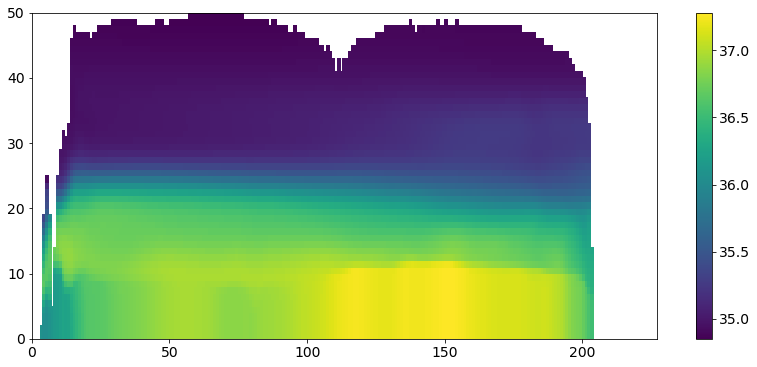

In [127]:
plt.pcolormesh(Salt_noland_masked[:,1]);plt.colorbar()

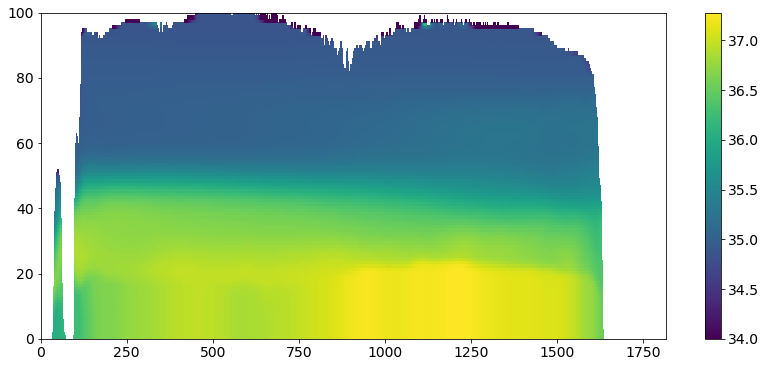

In [174]:
plt.pcolormesh(np.ma.masked_where(landmask_f_ds[:,2]==False, np.flipud(Salt_S_fine)), vmin=34);plt.colorbar()


